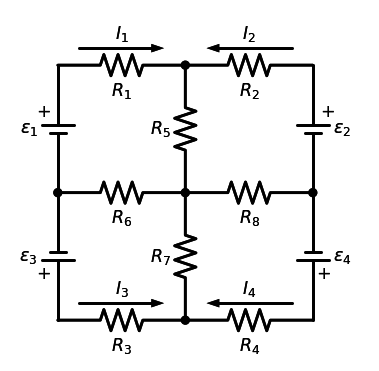

In [4]:
import schemdraw
import schemdraw.elements as elm
with schemdraw.Drawing(file='schematic.svg') as d:
    d += (R2 := elm.Resistor().label('$R_2$', loc='bottom'))
    d += elm.BatteryCell().down().label('$\epsilon_2$', loc='bottom').label("+", ofst=(-0.4, 0.9))
    d += elm.Resistor().left().label('$R_8$', loc='bottom')
    d += elm.Resistor().up().label('$R_5$')
    d += elm.Dot()
    d += (R1 := elm.Resistor().left().label('$R_1$', loc='bottom'))
    d += elm.BatteryCell().down().label('$\epsilon_1$', loc='top').label("+", ofst=(-0.4, 0.2))
    d += elm.Dot()
    d.push()
    d += elm.Resistor().right().label('$R_6$', loc='bottom')
    d.pop()
    d += elm.BatteryCell().down().reverse().label('$\epsilon_3$', loc='top').label("+", ofst=(0.4, 0.2))
    d += (R3 := elm.Resistor().right().label('$R_3$', loc='bottom'))
    d += elm.Dot()
    d.push()
    d += (R4 := elm.Resistor().right().label('$R_4$', loc='bottom'))
    d += elm.BatteryCell().up().label('$\epsilon_4$', loc='bottom').label("+", ofst=(-0.4, -0.8))
    d += elm.Dot()
    d.pop()
    d += elm.Resistor().up().label('$R_7$', loc='top')
    d += elm.Dot().color('black')
    d += elm.CurrentLabel().at(R1).label('$I_1$')
    d += elm.CurrentLabel().reverse().at(R2).label('$I_2$')
    d += elm.CurrentLabel().at(R3).label('$I_3$')
    d += elm.CurrentLabel().reverse().at(R4).label('$I_4$')

   $\varepsilon = \Sigma IR $
   
   $\varepsilon_1 = I_1 R_1 + (I_1+I_2)R_5 + (I_1+I_3)R_6$
   
   $\varepsilon_2 = I_2 R_2 + (I_1+I_2)R_5 + (I_2+I_4)R_8$
   
   $\varepsilon_3 = I_3 R_3 + (I_3+I_4)R_7 + (I_1+I_3)R_6$
   
   $\varepsilon_4 = I_4 R_4 + (I_3+I_4)R_7 + (I_2+I_4)R_8$
   
   maka:
   
   
   $I_1 = {\varepsilon_1\over R_1+R_5+R_6} + {\varepsilon_2\over R_5} + {\varepsilon_3\over R_6}$
   
   $I_2 = {\varepsilon_1\over R_5} + {\varepsilon_2\over R_2+R_5+R_8} + {\varepsilon_4\over R_8}$ 
   
   $I_3 = {\varepsilon_1\over R_6} + {\varepsilon_3\over R_3+R_7+R_6} + {\varepsilon_4\over R_7}$
   
   $I_4 = {\varepsilon_2\over R_8} + {\varepsilon_3\over R_7} + {\varepsilon_4\over R_4+R_7+R_8}$

matriksnya:
$$\begin{bmatrix} R_1+R_5+R_6 & R_5 & R_6 & 0 \\ R_5 & R_2+R_5+R_8 & 0 & R_8 \\ R_6 & 0 & R_3+R_7+R_6 & R_7 \\ 0 & R_8 & R_7 & R_4+R_7+R_8  \end{bmatrix} \begin{bmatrix} I_1\\I_2\\I_3\\I_4\end{bmatrix} = \begin{bmatrix} \varepsilon_1 \\ \varepsilon_2 \\ \varepsilon_3 \\ \varepsilon_4 \end{bmatrix} $$

matriks teraugmentasinya:
$$\left[\begin{array}{cccc|c} R_1+R_5+R_6 & R_5 & R_6 & 0 &  \varepsilon_1 \\ R_5 & R_2+R_5+R_8 & 0 & R_8 &  \varepsilon_2 \\ R_6 & 0 & R_3+R_7+R_6 & R_7 & \varepsilon_3 \\ 0 & R_8 & R_7 & R_4+R_7+R_8 & \varepsilon_4 \end{array}\right] $$

In [9]:
import numpy as np
R1 = 1
R2 = 2
R3 = 3
R4 = 4
R5 = 5
R6 = 6
R7 = 7
R8 = 8
ε1 = 12
ε2 = 15
ε3 = 16
ε4 = 19

A = np.array([[R1+R5+R6, R5, R6, 0], [R5, R2+R5+R8, 0, R8], [R6, 0, R3+R7+R6, R7], [0, R8, R7, R4+R7+R8] ])
B = np.array([ε1, ε2, ε3, ε4])
C = np.linalg.solve(A,B)

print(C)

[0.4950066  0.53250424 0.56623328 0.56717543]
